In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from sklearn.datasets import load_boston
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [2]:
house_price = load_boston()
df = pd.DataFrame(house_price.data, columns=house_price.feature_names)
df['PRICE'] = house_price.target
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [3]:
# standardize and train/test split
house_price.data = preprocessing.scale(house_price.data)
X_train, X_test, y_train, y_test = train_test_split(house_price.data, house_price.target, test_size=0.3, random_state=10)

In [4]:
ols_reg = LinearRegression()
ols_reg.fit(X_train, y_train)
ols_pred = ols_reg.predict(X_test)

pd.DataFrame({'variable': house_price.feature_names, 'estimate': ols_reg.coef_})
print('- Ridge Regression')

- Ridge Regression


In [5]:
house_price.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
# initialize
ridge_reg = Ridge(alpha=0)
ridge_reg.fit(X_train, y_train)
ridge_df = pd.DataFrame({'variable': house_price.feature_names, 'estimate': ridge_reg.coef_})
ridge_train_pred = []
ridge_test_pred = []

alphas = np.arange(0, 200, 1)

for alpha in alphas:
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train, y_train)
    var_name = 'estimate' + str(alpha)
    ridge_df[var_name] = ridge_reg.coef_
    # prediction
    ridge_train_pred.append(ridge_reg.predict(X_train))
    ridge_test_pred.append(ridge_reg.predict(X_test))
    
ridge_df = ridge_df.set_index('variable').T.rename_axis('estimate').rename_axis(None, 1).reset_index()

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ridge_df.RM, 'r', ridge_df.ZN, 'g', ridge_df.RAD, 'b', ridge_df.CRIM, 'c', ridge_df.TAX, 'y')
ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlabel("Lambda")
ax.set_ylabel("Beta Estimate")
ax.set_title("Ridge Regression Trace", fontsize=16)
ax.legend(labels=['Room','Residential Zone','Highway Access','Crime Rate','Tax'])
ax.grid(True)

TypeError: rename_axis() takes from 1 to 2 positional arguments but 3 were given

In [7]:
# initialize
lasso_reg = Lasso(alpha=1)
lasso_reg.fit(X_train, y_train)
lasso_df = pd.DataFrame({'variable': house_price.feature_names, 'estimate': lasso_reg.coef_})
lasso_train_pred = []
lasso_test_pred = []

alphas = np.arange(0.01, 8.01, 0.04)

for alpha in alphas:
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(X_train, y_train)
    var_name = 'estimate' + str(alpha)
    lasso_df[var_name] = lasso_reg.coef_
    # prediction
    lasso_train_pred.append(lasso_reg.predict(X_train))
    lasso_test_pred.append(lasso_reg.predict(X_test))

lasso_df = lasso_df.set_index('variable').T.rename_axis('estimate').rename_axis(None, 1).reset_index()

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(lasso_df.RM, 'r', lasso_df.ZN, 'g', lasso_df.RAD, 'b', lasso_df.CRIM, 'c', lasso_df.TAX, 'y')
ax.set_xlabel("Lambda")
ax.set_xticklabels(np.arange(-1, 10, 1))
ax.set_ylabel("Beta Estimate")
ax.set_title("Lasso Regression Trace", fontsize=16)
ax.legend(labels=['Room','Residential Zone','Highway Access','Crime Rate','Tax'])
ax.grid(True)

TypeError: rename_axis() takes from 1 to 2 positional arguments but 3 were given

In [ ]:
# R-squared of training set
ridge_r_squared_train = [r2_score(y_train, p) for p in ridge_train_pred]
lasso_r_squared_train = [r2_score(y_train, p) for p in lasso_train_pred]

# R-squared of test set
ridge_r_squared_test = [r2_score(y_test, p) for p in ridge_test_pred]
lasso_r_squared_test = [r2_score(y_test, p) for p in lasso_test_pred]

# ols for benchmark
ols_r_squared = r2_score(y_test, ols_pred)

# plot R-squared of training and test
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
plt.rcParams['axes.grid'] = True

# training set and test set together
axes[0,0].plot(ridge_r_squared_train, 'b', ridge_r_squared_test, 'r')
axes[0,0].set_title("Ridge Regression R-squared", fontsize=16)
axes[0,0].set_ylabel("R-squared")

axes[0,1].plot(lasso_r_squared_train, 'b', lasso_r_squared_test, 'r')
axes[0,1].set_title("Lasso Regression R-squared", fontsize=16)

# test set curve
axes[1,0].plot(ridge_r_squared_test[:25], 'ro')
axes[1,0].axhline(y=ols_r_squared, color='g', linestyle='--')
axes[1,0].set_title("Ridge Test Set Zoom-in", fontsize=16)
axes[1,0].set_xlabel("Model Simplicity$\longrightarrow$")
axes[1,0].set_ylabel("R-squared")

axes[1,1].plot(lasso_r_squared_test[:25], 'ro')
axes[1,1].axhline(y=ols_r_squared, color='g', linestyle='--')
axes[1,1].set_title("Lasso Test Set Zoom-in", fontsize=16)
axes[1,1].set_xlabel("Model Simplicity$\longrightarrow$")

Text(0.5, 0, 'Model Simplicity$\\longrightarrow$')

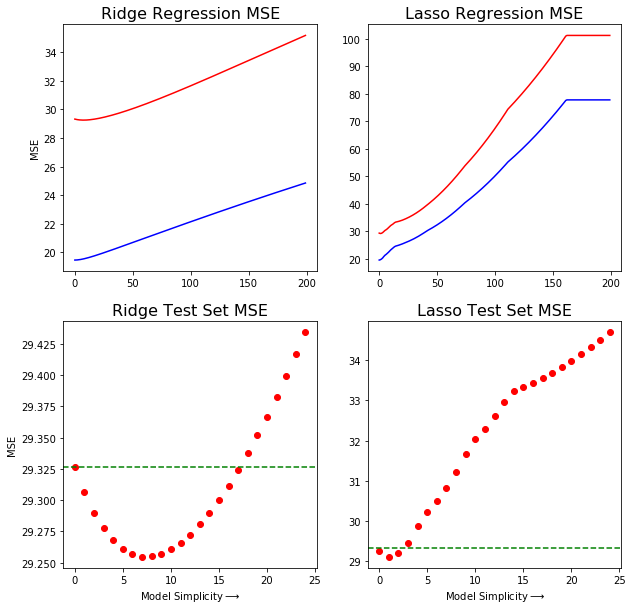

In [8]:
# MSE of training set
ridge_mse_train = [mean_squared_error(y_train, p) for p in ridge_train_pred]
lasso_mse_train = [mean_squared_error(y_train, p) for p in lasso_train_pred]

# MSE of test set
ridge_mse_test = [mean_squared_error(y_test, p) for p in ridge_test_pred]
lasso_mse_test = [mean_squared_error(y_test, p) for p in lasso_test_pred]

# ols mse for benchmark
ols_mse = mean_squared_error(y_test, ols_pred)

# plot MSE of training and test
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
plt.rcParams['axes.grid'] = True

# training set and test set together
axes[0,0].plot(ridge_mse_train, 'b', ridge_mse_test, 'r')
axes[0,0].set_title("Ridge Regression MSE", fontsize=16)
axes[0,0].set_ylabel("MSE")

axes[0,1].plot(lasso_mse_train, 'b', lasso_mse_test, 'r')
axes[0,1].set_title("Lasso Regression MSE", fontsize=16)

# test set curve
axes[1,0].plot(ridge_mse_test[:25], 'ro')
axes[1,0].axhline(y=ols_mse, color='g', linestyle='--')
axes[1,0].set_title("Ridge Test Set MSE", fontsize=16)
axes[1,0].set_xlabel("Model Simplicity$\longrightarrow$")
axes[1,0].set_ylabel("MSE")

axes[1,1].plot(lasso_mse_test[:25], 'ro')
axes[1,1].axhline(y=ols_mse, color='g', linestyle='--')
axes[1,1].set_title("Lasso Test Set MSE", fontsize=16)
axes[1,1].set_xlabel("Model Simplicity$\longrightarrow$")

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
# ols for comparison
print("OLS R-squared:", round(ols_r_squared, 4))
print("OLS MSE:", round(ols_mse, 4))

NameError: name 'ols_r_squared' is not defined

In [11]:
# parameter setup
param = {'alpha': np.arange(0.01, 10, 0.01)}

ridge_reg_grid = GridSearchCV(Ridge(), param)
ridge_reg_grid.fit(X_train, y_train)
ridge_grid_pred = ridge_reg_grid.predict(X_test)

print(ridge_reg_grid.best_estimator_)
print("\nR-Squared:", round(r2_score(y_test, ridge_grid_pred), 4))
print("MSE:", round(mean_squared_error(y_test, ridge_grid_pred), 4))

/home/asm/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Ridge(alpha=4.99, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

R-Squared: 0.7003
MSE: 29.2611


In [12]:
lasso_reg_grid = GridSearchCV(Lasso(), param)
lasso_reg_grid.fit(X_train, y_train)
lasso_grid_pred = lasso_reg_grid.predict(X_test)

print(lasso_reg_grid.best_estimator_)
print("\nR-Squared:", round(r2_score(y_test, lasso_grid_pred), 4))
print("MSE:", round(mean_squared_error(y_test, lasso_grid_pred), 4))

/home/asm/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Lasso(alpha=0.02, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

R-Squared: 0.7008
MSE: 29.2104


In [13]:
from sklearn.linear_model import RidgeCV
from yellowbrick.regressor import AlphaSelection # visualization

In [14]:
alphas=np.arange(0.01, 10, 0.01)
ridgeCV_reg = RidgeCV(alphas=alphas)
ridgeCV_reg.fit(X_train, y_train)
visualizer = AlphaSelection(ridgeCV_reg)

visualizer.fit(X_train, y_train)
g = visualizer.poof()

ridgeCV_pred = ridgeCV_reg.predict(X_test)
print("R-squared:", round(r2_score(y_test, ridgeCV_pred), 4))

YellowbrickValueError: could not find errors param on RidgeCV estimator